## Worshop 2.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.1'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [7]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элеметнов датасета

In [8]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [15]:
print(f"Количество колонок {df.shape[1]}, строк {df.shape[0]}")

Количество колонок 15, строк 32561


3) Какие типы данных у элементов этого датасета?

In [12]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [14]:
df.isnull().sum() # workclass, occupation, native.country      

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Пропуски могут быть связаны с тем, что люди не указали свои данные

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [18]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [19]:
df.groupby("sex")['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

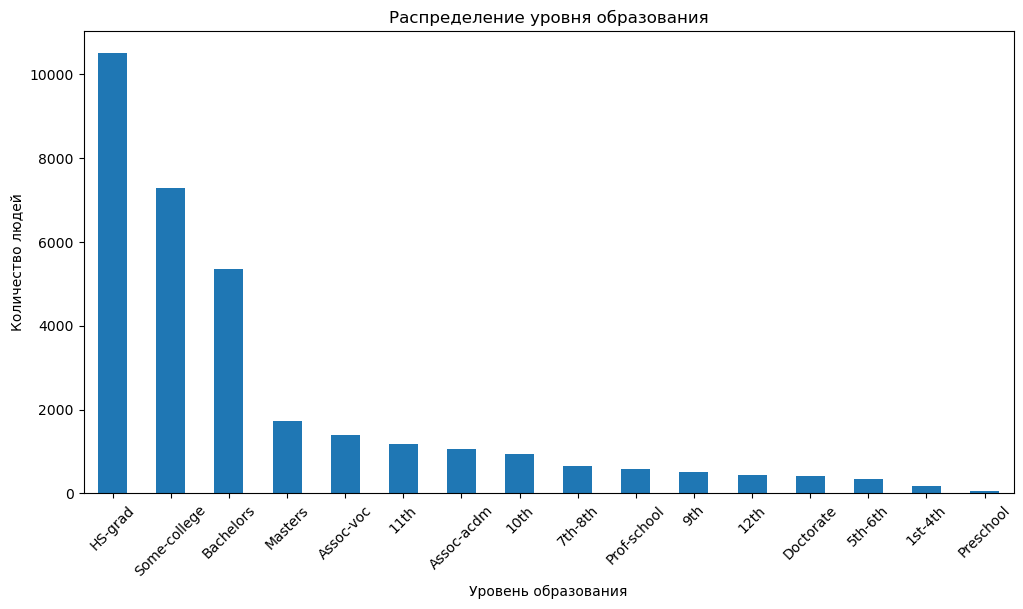

In [22]:
import matplotlib.pyplot as plt

df['education'].value_counts().plot(kind='bar', figsize=(12,6))
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.title('Распределение уровня образования')
plt.xticks(rotation=45)
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [ ]:
df.groupby('income')['age'].agg(['mean', 'std']) # Опечатка в задани, признак income, а не salary

,mean,std
income,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
higher_ed = {'Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'}
df_high_income = df[df['income'] == '>50K']

all(df_high_income['education'].isin(higher_ed)) 
# Неправда :(

False

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [38]:
married = df['marital.status'].str.startswith('Married')
men = df['sex'] == 'Male'

high_income_ratio = df[men].groupby(married)['income'].apply(lambda x: (x == '>50K').mean())
high_income_ratio


marital.status
False    0.084495
True     0.440514
Name: income, dtype: float64

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [41]:
df.groupby(['native.country', 'income'])['hours.per.week'].mean().unstack()


income,<=50K,>50K
native.country,,
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [ ]:
df['passive_income'] = df['capital.gain'] - df['capital.loss']

df['income_category'] = pd.qcut(df['passive_income'], q=10, labels=False, duplicates='drop')
pivot_table = df.pivot_table(values='passive_income', index='education', columns='income_category', aggfunc='count')
pivot_table


income_category,0,1
education,,
10th,893,40
11th,1122,53
12th,411,22
1st-4th,163,5
5th-6th,319,14
7th-8th,605,41
9th,483,31
Assoc-acdm,985,82
Assoc-voc,1248,134


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
df_women = df[df['sex'] == 'Female']
df_women.groupby('native.country')['income'].apply(lambda x: (x == '>50K').mean()).sort_values(ascending=False)
# Yugoslavia                    

native.country
Yugoslavia                    0.333333
Taiwan                        0.266667
Japan                         0.250000
France                        0.250000
Iran                          0.250000
China                         0.238095
Italy                         0.238095
Canada                        0.230769
Scotland                      0.200000
Greece                        0.200000
England                       0.187500
India                         0.181818
Hong                          0.166667
Portugal                      0.166667
Hungary                       0.166667
Philippines                   0.164384
Ireland                       0.142857
Honduras                      0.142857
Laos                          0.125000
Germany                       0.116667
United-States                 0.110721
Poland                        0.105263
South                         0.100000
Thailand                      0.090909
Nicaragua                     0.083333
Cuba      

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [44]:
import numpy as np
np.random.seed(42)

df['magic_salary'] = np.where(df['income'] == '<=50K', 
                              np.random.randint(0, 51, size=len(df)), 
                              np.random.randint(51, 201, size=len(df)))

df['hourly_magic_salary'] = df['magic_salary'] / df['hours.per.week']
df.groupby('education')['hourly_magic_salary'].mean()


education
10th            1.096541
11th            1.107875
12th            0.991843
1st-4th         0.844584
5th-6th         0.849843
7th-8th         0.975634
9th             1.040545
Assoc-acdm      1.543117
Assoc-voc       1.367949
Bachelors       1.692264
Doctorate       2.888903
HS-grad         1.125120
Masters         2.119717
Preschool       0.759717
Prof-school     2.369531
Some-college    1.265424
Name: hourly_magic_salary, dtype: float64